# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
train_df=pd.read_csv("/kaggle/input/playground-series-s3e10/train.csv")
train_df.head()

,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,0,133.171875,59.716081,0.043133,-0.703383,54.917224,70.084438,0.749798,-0.649512,0
1,1,87.093750,36.257973,0.435469,2.266057,3.417224,21.865069,7.039330,52.686251,0
2,2,112.640625,39.818393,0.379639,0.922306,2.730769,15.689690,8.193471,85.649785,0
3,3,120.679688,45.918448,-0.098490,0.011775,2.696488,20.954662,8.183874,70.332899,0
4,4,134.070312,57.720107,-0.107772,-0.573335,1.107860,11.255051,16.107748,308.753765,0


In [3]:
# Checking how many classes are there in the label column
train_df["Class"].unique()

array([0, 1])

# Check for NA values

In [4]:
train_df.isna().sum()

id                      0
Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64

# Train and Test split

In [5]:
X=train_df.drop(["id","Class"], axis=1)
y=train_df["Class"]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10, test_size=0.25)

# Parameters for the models

In [7]:
# Parameters for XGBoost, LGBoost 
param_dist = {"max_depth": [10,30],
              "min_child_weight" : [1,3],
              "n_estimators": [20],
              "learning_rate": [0.05, 0.1]}

#Parameters for Catboost
params = {'depth': [4, 7],
          'learning_rate' : [0.03, 0.1],
         'l2_leaf_reg': [1,4],
         'iterations': [10]}

# XGBoost

In [8]:
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Parameter Tuning
model = xgb.XGBClassifier()

grid_search = GridSearchCV(model, param_grid=param_dist, cv = 3, verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

xgb_model=grid_search.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


Why use GridSearchCV?

GridSearchCV can find the optimal set of hyperparameters that give the best performance on the validation data. In contrast, the second block of code uses fixed hyperparameters that may not be the best for the given data.

GridSearchCV uses cross-validation to evaluate the performance of the model with different hyperparameters. This helps to prevent overfitting to the training data and provides a more reliable estimate of the model's generalization performance.

GridSearchCV searches over a predefined range of hyperparameters, which can be more efficient than manually specifying hyperparameters in the second block of code. Additionally, GridSearchCV can search over a larger range of hyperparameters than what may be manually specified.

Finally, GridSearchCV provides a systematic approach to hyperparameter tuning, which can save time and reduce the risk of overlooking important hyperparameters.

# LGBoost

In [9]:
import lightgbm as lgb

lg = lgb.LGBMClassifier()
grid_search = GridSearchCV(lg,param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=10, n_jobs=-1)
grid_search.fit(X_train,y_train)
lg_model=grid_search.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


# CatBoost

In [10]:
import catboost as cb
cb = cb.CatBoostClassifier()
grid_search = GridSearchCV(cb, params, scoring="roc_auc", cv = 3, verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)
cb_model=grid_search.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3; 1/8] START depth=4, iterations=10, l2_leaf_reg=1, learning_rate=0.03...
0:	learn: 0.6648013	total: 65.2ms	remaining: 587ms
1:	learn: 0.6380585	total: 71ms	remaining: 284ms
2:	learn: 0.6129349	total: 76ms	remaining: 177ms
3:	learn: 0.5891902	total: 80.7ms	remaining: 121ms
4:	learn: 0.5667107	total: 86.5ms	remaining: 86.5ms
5:	learn: 0.5454419	total: 91.6ms	remaining: 61ms
6:	learn: 0.5252578	total: 97.4ms	remaining: 41.8ms
7:	learn: 0.5060859	total: 102ms	remaining: 25.5ms
8:	learn: 0.4878145	total: 106ms	remaining: 11.8ms
9:	learn: 0.4704742	total: 111ms	remaining: 0us
[CV 1/3; 1/8] END depth=4, iterations=10, l2_leaf_reg=1, learning_rate=0.03;, score=0.994 total time=   0.3s
[CV 2/3; 1/8] START depth=4, iterations=10, l2_leaf_reg=1, learning_rate=0.03...
0:	learn: 0.6646495	total: 4.66ms	remaining: 41.9ms
1:	learn: 0.6378295	total: 9.89ms	remaining: 39.6ms
2:	learn: 0.6126308	total: 16.5ms	remaining: 38.6ms
3:	learn:

# Prediction (Confusion matrix, Accuracy and Precision)

In [11]:
import matplotlib.pyplot as plt
accu=[]
preci=[]
def pred(model):
    pred = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(y_test, pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
    cm_display.plot()
    plt.show()
    acc=metrics.accuracy_score(y_test, pred)
    prec=metrics.precision_score(y_test, pred)
    accu.append(acc)
    preci.append(prec)

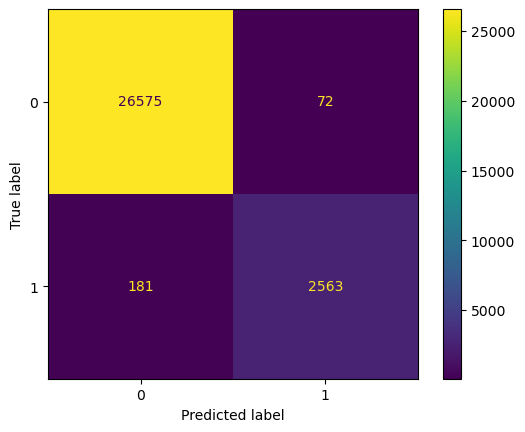

In [12]:
pred(xgb_model)

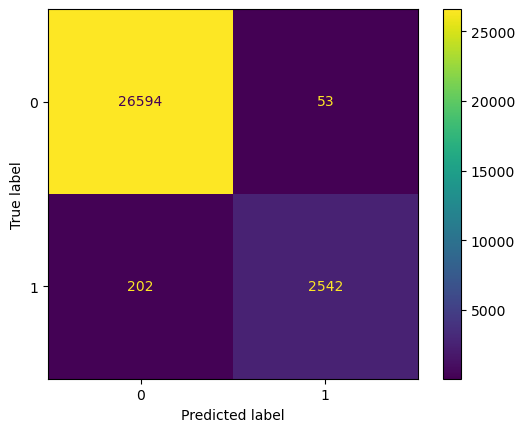

In [13]:
pred(lg_model)

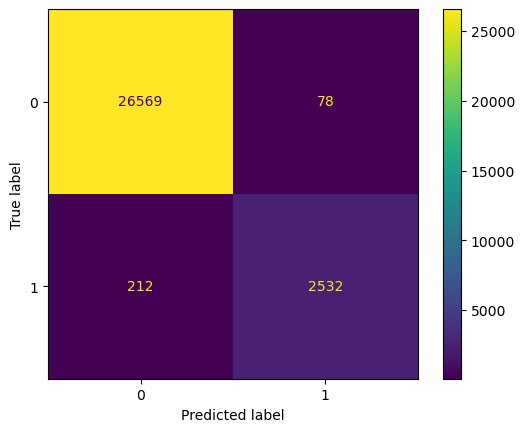

In [14]:
pred(cb_model)

# Comparing the models

In [15]:
from tabulate import tabulate
data={'Models':['XGBoost','LGBoost','CatBoost'],
     'Accuracy': accu,
     'Precision':preci}
df=pd.DataFrame(data)
print(tabulate(df, headers='keys', tablefmt='psql'))

+----+----------+------------+-------------+
|    | Models   |   Accuracy |   Precision |
|----+----------+------------+-------------|
|  0 | XGBoost  |   0.991392 |    0.972676 |
|  1 | LGBoost  |   0.991324 |    0.979576 |
|  2 | CatBoost |   0.990133 |    0.970115 |
+----+----------+------------+-------------+


# Submission

In [16]:
sub_ex=pd.read_csv("/kaggle/input/playground-series-s3e10/sample_submission.csv")
sub_ex.head()

,id,Class
0,117564,0.5
1,117565,0.5
2,117566,0.5
3,117567,0.5
4,117568,0.5


In [17]:
test_df=pd.read_csv("/kaggle/input/playground-series-s3e10/test.csv")
test_df.head()

,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
0,117564,140.046875,54.507800,0.058862,-0.567263,2.337793,14.868335,9.591760,117.988781
1,117565,107.828125,51.578965,0.284368,-0.338430,1.574415,12.501437,11.694968,182.704822
2,117566,135.062500,49.812343,-0.087784,-0.094341,3.576923,21.243336,7.252386,59.021499
3,117567,112.812500,41.926647,0.519921,1.287762,6.669732,29.013153,5.097661,27.105240
4,117568,96.210938,35.322620,0.481286,2.443080,2.218227,17.041064,9.766006,117.131775


In [18]:
pred = xgb_model.predict(test_df.drop("id", axis=1))
pred

array([0, 0, 0, ..., 0, 0, 1])

In [19]:
sub_df=pd.DataFrame()
sub_df["id"]=test_df["id"]
sub_df["Class"]=pred
sub_df.head()

,id,Class
0,117564,0
1,117565,0
2,117566,0
3,117567,0
4,117568,0


In [20]:
sub_df.to_csv("submission.csv", index=None)

# References:
1. https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db